In [44]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [45]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## EDA

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
len(train_labels)

60000

In [49]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

# Preprocessing

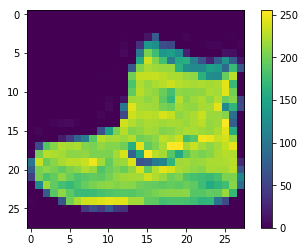

In [50]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Normalize values between 0 and 1

In [51]:
train_images = train_images / 255.0
test_images = test_images / 255.0

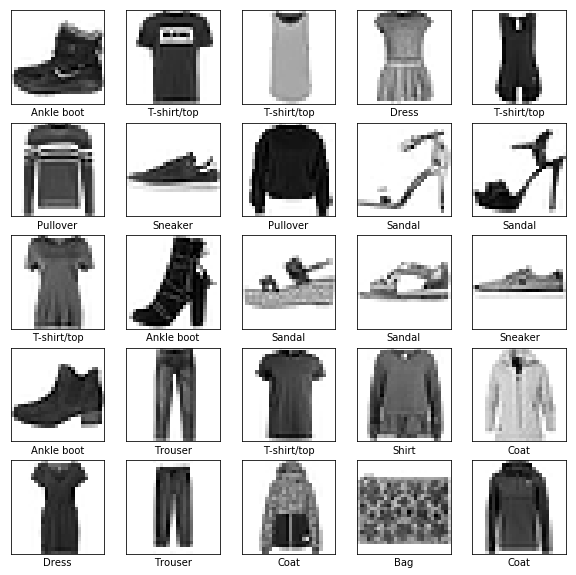

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modeling

The model structure consists of only a few layers:
- ```flatten``` layer that just turns the 2d image arrays (28x28) into 1d arrays (1x784). 
- A ```Dense``` (fully connected) layer with a ```RelU``` activation function
- A ```Dense``` layer with a ```softmax``` activation function that returns an array of 10 probability scores and summs them to 1

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Before the model is ready for training, it needs to be *compiled*. In this step, we specify a ```loss function```, ```optimizer```, and ```metrics```.

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

Training

In [55]:
%%time
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4960 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3720 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3327 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3090 - acc: 0.8872
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2930 - acc: 0.8919
CPU times: user 42.3 s, sys: 5.36 s, total: 47.7 s
Wall time: 24 s


## Eval

In [56]:
len(test_images)

10000

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3469 - acc: 0.8728
Test accuracy:  0.8728


In [58]:
predictions = model.predict(test_images)

In [60]:
predictions[0]

array([9.9011095e-06, 1.6086180e-06, 1.8231490e-06, 2.6017125e-07,
       1.7082644e-06, 7.4418797e-03, 1.3696785e-05, 1.2546620e-02,
       1.1773151e-05, 9.7997069e-01], dtype=float32)

In [61]:
np.argmax(predictions[0])

9

In [62]:
test_labels[0]

9

In [65]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')        

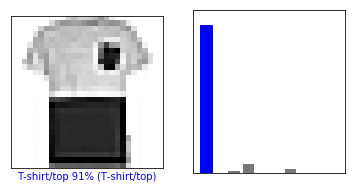

In [68]:
i = 120
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

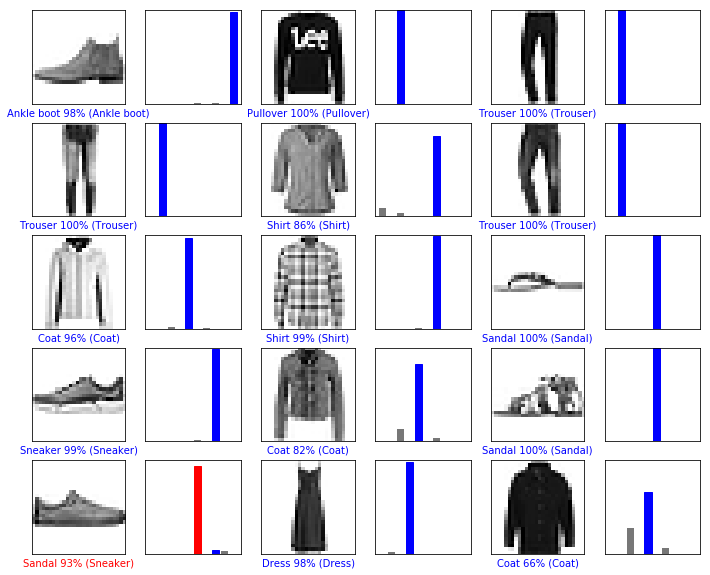

In [69]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Get prediction on a single image

In [73]:
img = test_images[0]
img.shape

(28, 28)

In [74]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [81]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.9010995e-06 1.6086150e-06 1.8231474e-06 2.6017076e-07 1.7082644e-06
  7.4418755e-03 1.3696798e-05 1.2546608e-02 1.1773129e-05 9.7997069e-01]]


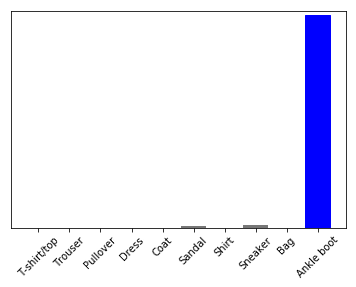

In [82]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [83]:
np.argmax(predictions_single[0])

9